In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# import tensorflow as tf
# import keras
# import librosa
# from librosa import display
%matplotlib inline

In [58]:
train = pd.read_csv("D:\DESKTOP/JUPYTER/train_keypoints_yoga82.csv")

In [59]:
train.labels.value_counts()

6    274
4    240
8    189
3    162
5    158
7    135
2    123
1    111
0    110
Name: labels, dtype: int64

In [60]:
x_train = train.drop(['file_name', 'labels'], axis=1)
y_train = train.labels

In [61]:
y_train = y_train.astype('float64')

In [62]:
test = pd.read_csv("D:\DESKTOP/JUPYTER/test_keypoints_yoga82.csv")

In [63]:
test.labels.value_counts()

6    69
4    60
8    47
5    40
3    40
7    34
2    31
0    28
1    27
Name: labels, dtype: int64

In [64]:
x_test = test.drop(['file_name', 'labels'], axis=1)
y_test = test.labels

In [65]:
y_test = test.labels.astype('float64')

In [66]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1502, 99)
(1502,)
(376, 99)
(376,)


In [110]:
def num_to_pose(y_test,y_pred):
    pose_test = [None] * y_test.size
    pose_pred = [None] * y_pred.size

    for i in range(len(y_test)):
        if(y_test[i]==0): pose_test[i] = 'Plank'           
        if(y_test[i]==1): pose_test[i] = 'Warrior_I'       
        if(y_test[i]==2): pose_test[i] = 'Standing_big_toe'     
        if(y_test[i]==3): pose_test[i] = 'Warrior_II'         
        if(y_test[i]==4): pose_test[i] = 'Cat_Cow'         
        if(y_test[i]==5): pose_test[i] = 'Child'            
        if(y_test[i]==6): pose_test[i] = 'Cobra'     
        if(y_test[i]==7): pose_test[i] = 'Tree'              
        if(y_test[i]==8): pose_test[i] = 'Downward-Facing_Dog'

    for i in range(len(y_pred)):
        if(y_pred[i]==0): pose_pred[i] = 'Plank'                           
        if(y_pred[i]==1): pose_pred[i] = 'Warrior_I'                   
        if(y_pred[i]==2): pose_pred[i] = 'Standing_big_toe'     
        if(y_pred[i]==3): pose_pred[i] = 'Warrior_II'                      
        if(y_pred[i]==4): pose_pred[i] = 'Cat_Cow'                                              
        if(y_pred[i]==5): pose_pred[i] = 'Child'                                 
        if(y_pred[i]==6): pose_pred[i] = 'Cobra'                              
        if(y_pred[i]==7): pose_pred[i] = 'Tree'                                    
        if(y_pred[i]==8): pose_pred[i] = 'Downward-Facing_Dog'        
    return pose_test, pose_pred

In [68]:
from sklearn.metrics import accuracy_score, f1_score

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

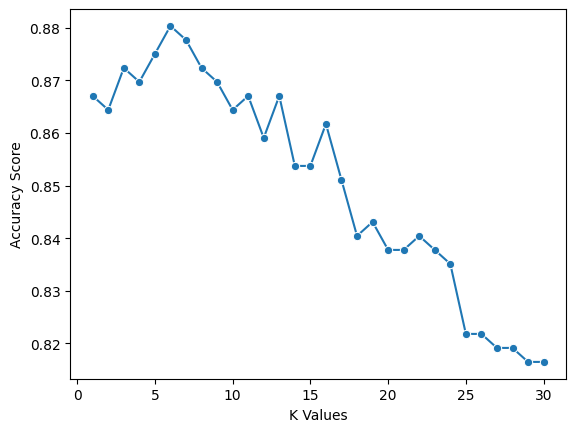

In [78]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [103]:
knn = KNeighborsClassifier(n_neighbors=6)

In [104]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [105]:
knn.score(x_train,y_train)

0.9041278295605859

In [112]:
knn.score(x_test,y_test)

0.8803191489361702

In [113]:
y_pred_knn = knn.predict(x_test)

In [114]:
f1_score(y_test, y_pred_knn, average='weighted')

0.8797862203486387

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)

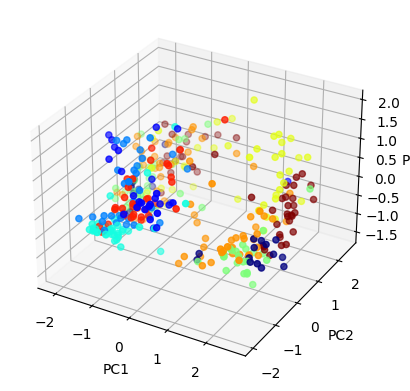

In [98]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Instantiate PCA object with 3 principal components
pca = PCA(n_components=3)

# Fit and transform the feature data to 3 principal components
x_pca = pca.fit_transform(x_test)

# Create 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# Scatter plot of the transformed data with class labels
ax.scatter3D(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=y_test, cmap='jet')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


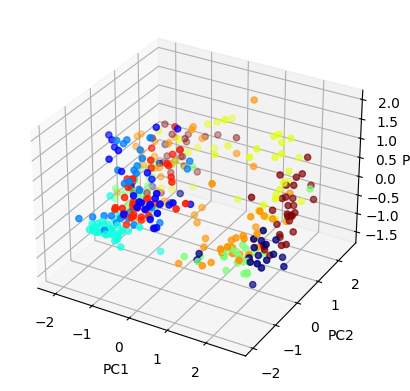

In [97]:
import matplotlib.pyplot as plt

# Train a KNN classifier on the data
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)

# Predict class labels for the original data
y_pred = knn.predict(x_test)

# Select the first three features
# x_train_3d = x_train[:, :3]
# x_test_3d = x_test[:, :3]
pca = PCA(n_components=3)
x_train_3d = pca.fit_transform(x_train)
x_test_3d = pca.fit_transform(x_test)

ax = plt.axes(projection='3d')

# Create a scatter plot of the test data with predicted class labels and a colorful colormap
ax.scatter3D(x_test_3d[:, 0], x_test_3d[:, 1], x_test_3d[:, 2], c=y_pred, cmap='jet')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
# ax.title('Test data predictions')

plt.show()


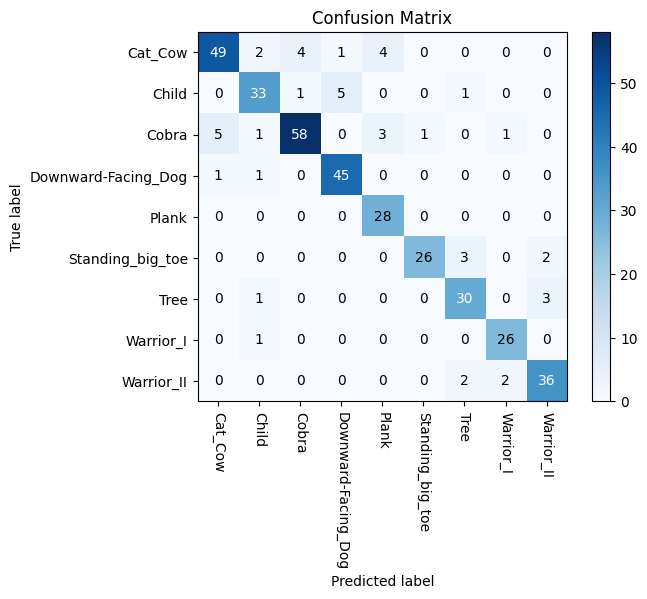

In [115]:
import matplotlib.pyplot as plt
import scikitplot as skplt

pose_test, pose_pred_knn = num_to_pose(y_test,y_pred_knn)
skplt.metrics.plot_confusion_matrix(pose_test, pose_pred_knn)

# Rotate x-axis labels
plt.xticks(rotation=270)
plt.show()